In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [3]:
df = pd.read_csv("../Python/Output/UncertainSin_18.txt", sep='\t')
df.head()

,Order,Index,Sin Value,Sin Uncertainty,Sin Normalized Error,Cos Value,Cos Uncertainty,Cos Normalized Error,Error Value,Error Uncertainty,Normalized Error
0,0,0,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000
1,1,65536,0.707107,7.850444e-17,0.000000,0.707107,7.850444e-17,0.0,2.220446e-16,1.812974e-16,1.224754
2,2,32768,0.382683,6.526114e-17,-0.850600,0.923880,8.981547e-17,0.0,0.000000e+00,1.854770e-16,0.000000
3,3,16384,0.195090,1.168750e-16,0.474962,0.980785,9.265520e-17,0.0,0.000000e+00,1.980826e-16,0.000000
4,4,8192,0.098017,2.365415e-16,0.176009,0.995185,9.337841e-17,0.0,0.000000e+00,2.019959e-16,0.000000


In [4]:
df['Order'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17], dtype=int64)

In [5]:
df['arc'] = df['Index'] / (1 << 17) * math.pi
df['lib error'] = np.sin(df['arc']) ** 2 + np.cos(df['arc']) ** 2 - 1
df.head()

,Order,Index,Sin Value,Sin Uncertainty,Sin Normalized Error,Cos Value,Cos Uncertainty,Cos Normalized Error,Error Value,Error Uncertainty,Normalized Error,arc,lib error
0,0,0,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
1,1,65536,0.707107,7.850444e-17,0.000000,0.707107,7.850444e-17,0.0,2.220446e-16,1.812974e-16,1.224754,1.570796,0.000000e+00
2,2,32768,0.382683,6.526114e-17,-0.850600,0.923880,8.981547e-17,0.0,0.000000e+00,1.854770e-16,0.000000,0.785398,2.220446e-16
3,3,16384,0.195090,1.168750e-16,0.474962,0.980785,9.265520e-17,0.0,0.000000e+00,1.980826e-16,0.000000,0.392699,0.000000e+00
4,4,8192,0.098017,2.365415e-16,0.176009,0.995185,9.337841e-17,0.0,0.000000e+00,2.019959e-16,0.000000,0.196350,0.000000e+00


# vs Order

In [6]:
def PlotMeanDev(column, logy=True):
    fig, ax = plt.subplots()
    dfMean = df[['Order', column]].groupby('Order').mean()
    dfDev = df[['Order', column]].groupby('Order').std()
    ax.set_title(column)
    ax.set_xlabel('Order')
    if logy:
        ax.set_yscale('log')
    plt.grid(True)
    ax.plot(dfMean.index, dfMean[column], label='Mean')
    ax.plot(dfDev.index, dfDev[column], label='Deviation')
    ax.legend(bbox_to_anchor=(1.4, 1.0))

In [7]:
def PlotMeanDev2(column, column2, logy=True):
    fig, ax = plt.subplots()
    ax.set_title(f'{column} vs {column2}')
    ax.set_xlabel('Order')
    if logy:
        ax.set_yscale('log')
    plt.grid(True)
    dfMean = df[['Order', column]].groupby('Order').mean()
    dfDev = df[['Order', column]].groupby('Order').std()
    ax.plot(dfMean.index, dfMean[column], 'b-', label=f'{column} Mean')
    ax.plot(dfDev.index, dfDev[column], 'b--', label=f'{column} Deviation')
    dfMean = df[['Order', column2]].groupby('Order').mean()
    dfDev = df[['Order', column2]].groupby('Order').std()
    ax.plot(dfMean.index, dfMean[column2], 'g-', label=f'{column2} Mean')
    ax.plot(dfDev.index, dfDev[column2], 'g--', label=f'{column2} Deviation')
    ax.legend(bbox_to_anchor=(1.0, 1.0))

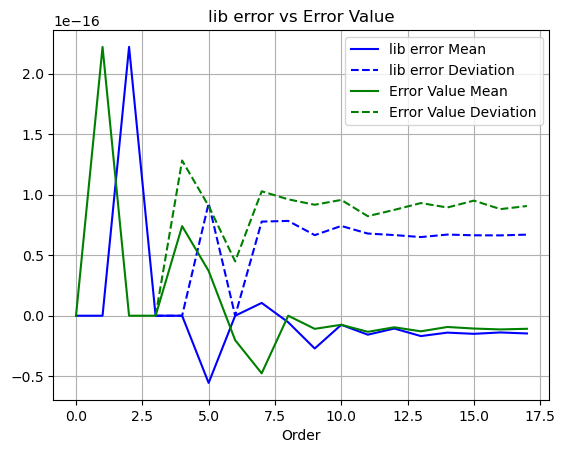

In [8]:
PlotMeanDev2('lib error', 'Error Value', logy=False)

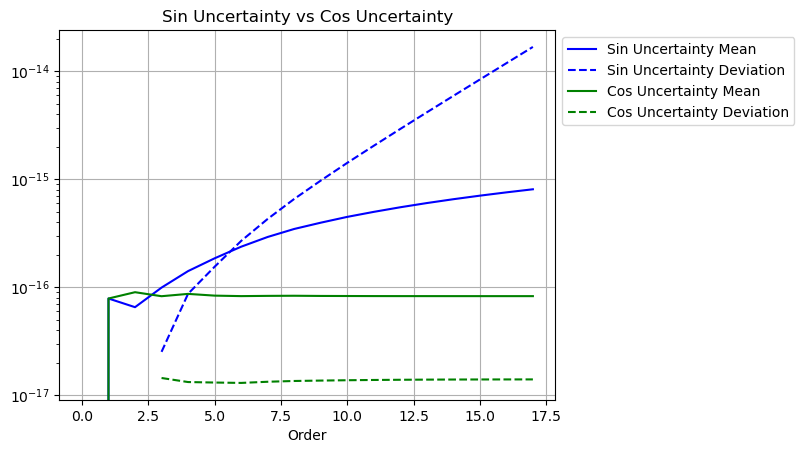

In [9]:
PlotMeanDev2('Sin Uncertainty', 'Cos Uncertainty')

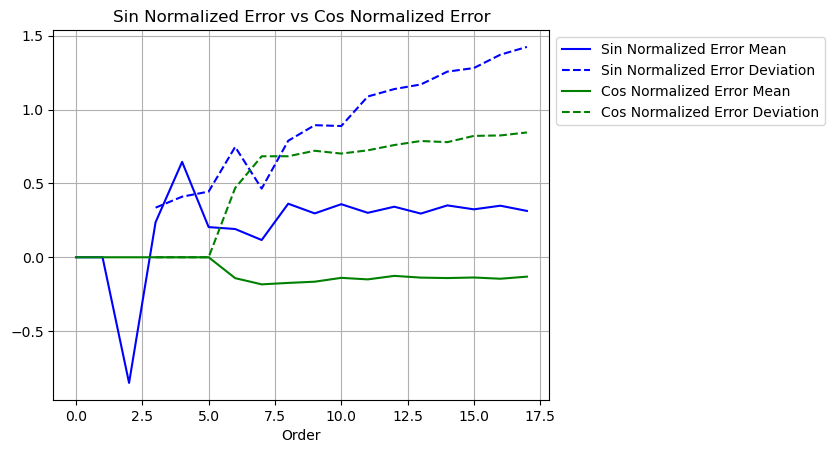

In [10]:
PlotMeanDev2('Sin Normalized Error', 'Cos Normalized Error', logy=False)

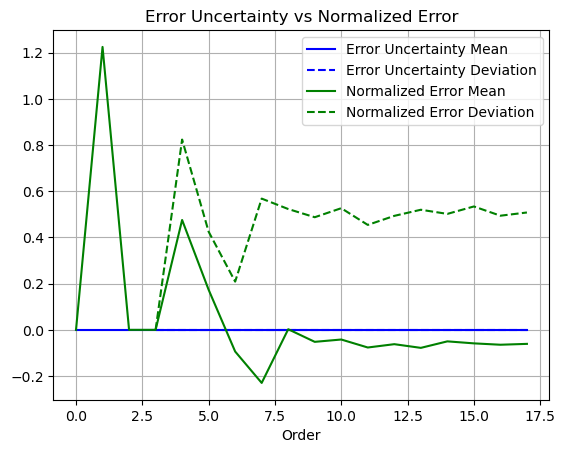

In [11]:
PlotMeanDev2('Error Uncertainty', 'Normalized Error', logy=False)

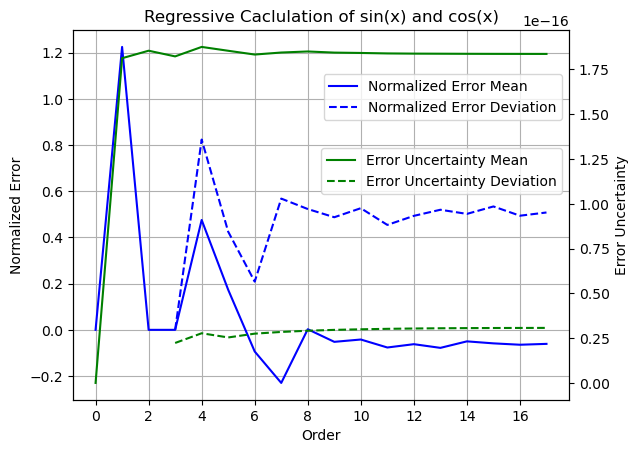

In [25]:
column = 'Normalized Error'
column2 = 'Error Uncertainty'

fig, ax = plt.subplots()
ax.set_title(f'Regressive Caclulation of sin(x) and cos(x)')
ax.set_xlabel('Order')
ax.set_xticks(range(0, 18, 2))
ax.set_ylabel(column)
plt.grid(True)

dfMean = df[['Order', column]].groupby('Order').mean()
dfDev = df[['Order', column]].groupby('Order').std()
ax.plot(dfMean.index, dfMean[column], 'b-', label=f'{column} Mean')
ax.plot(dfDev.index, dfDev[column], 'b--', label=f'{column} Deviation')

ax2 = ax.twinx()
ax2.set_ylabel(column2)
dfMean = df[['Order', column2]].groupby('Order').mean()
dfDev = df[['Order', column2]].groupby('Order').std()
ax2.plot(dfMean.index, dfMean[column2], 'g-', label=f'{column2} Mean')
ax2.plot(dfDev.index, dfDev[column2], 'g--', label=f'{column2} Deviation')

ax.legend(bbox_to_anchor=(1.0, 0.9))
ax2.legend(bbox_to_anchor=(1.0, 0.7))

In [27]:
df[df['Order']==17]['Normalized Error'].std()

0.5080379364338192

In [28]:
df[df['Order']==16]['Normalized Error'].std()

0.4940908216932661

# Histogram

In [14]:
def PlotHisto(column, order, bins):
    fig, ax = plt.subplots()
    ax.set_title(f'Histogram of {column} for order {order}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    plt.grid(True)
    df[(df['Order']==order)].hist(column=column, bins=bins, ax=ax)

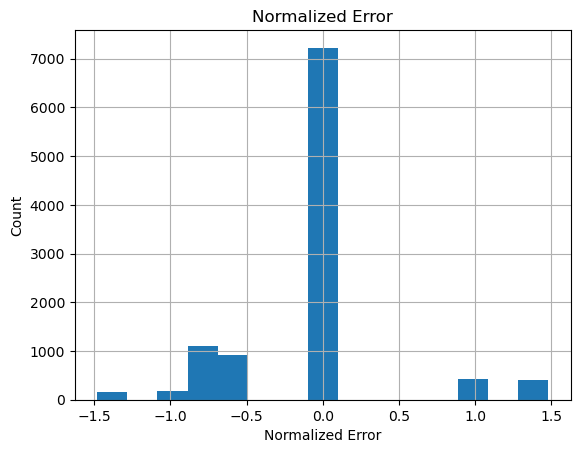

In [15]:
PlotHisto('Normalized Error', 16, 15)

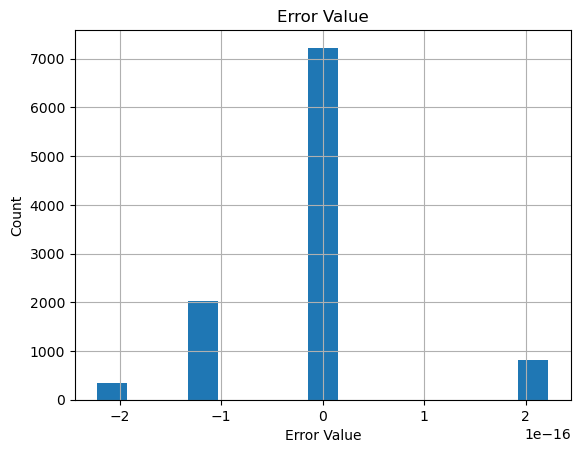

In [16]:
PlotHisto('Error Value', 16, 15)

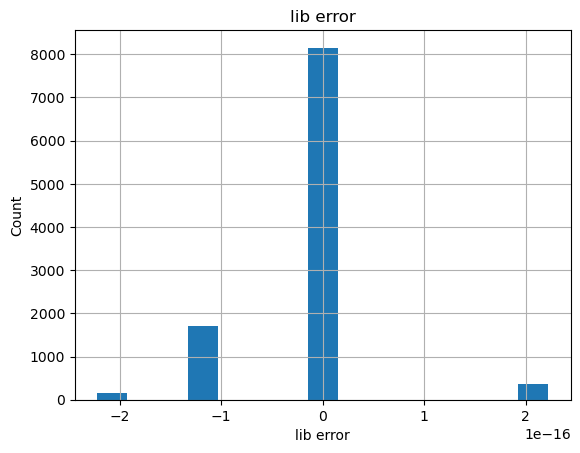

In [17]:
PlotHisto('lib error', 16, 15)

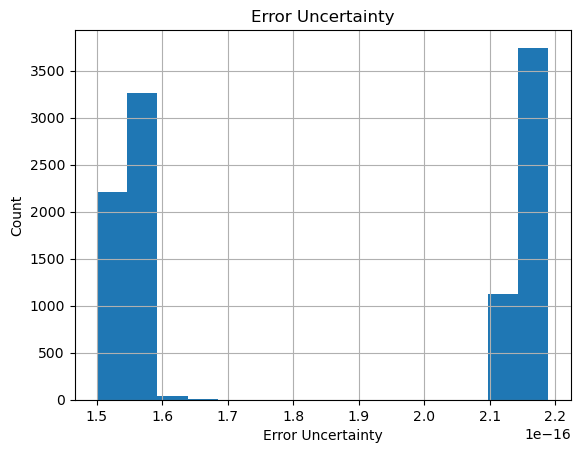

In [18]:
PlotHisto('Error Uncertainty', 16, 15)

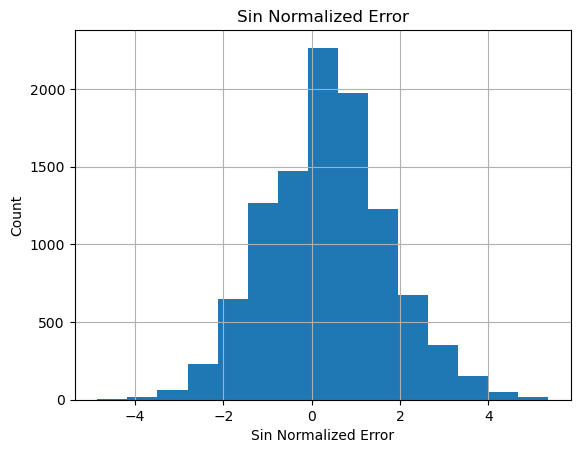

In [19]:
PlotHisto('Sin Normalized Error', 16, 15)

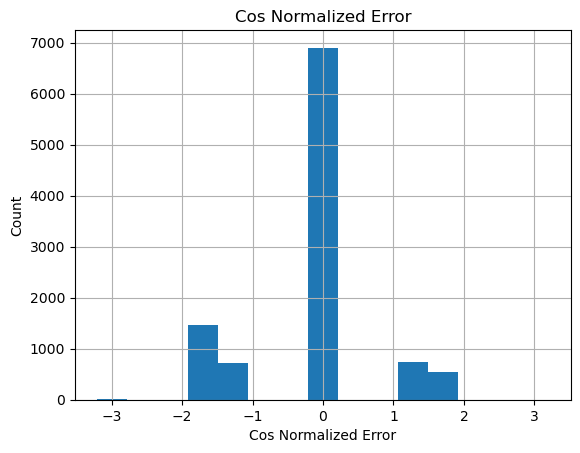

In [20]:
PlotHisto('Cos Normalized Error', 16, 15)

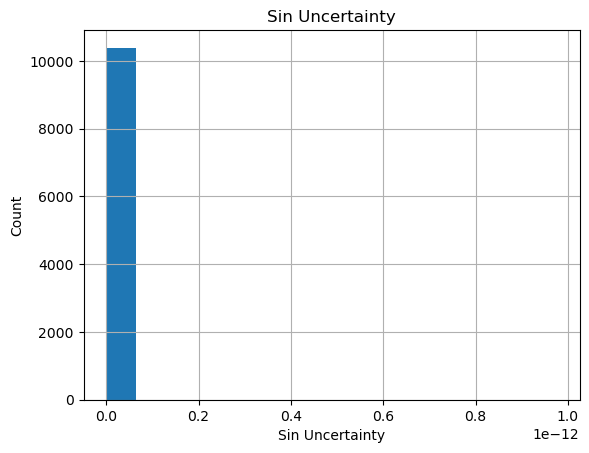

In [21]:
PlotHisto('Sin Uncertainty', 16, 15)

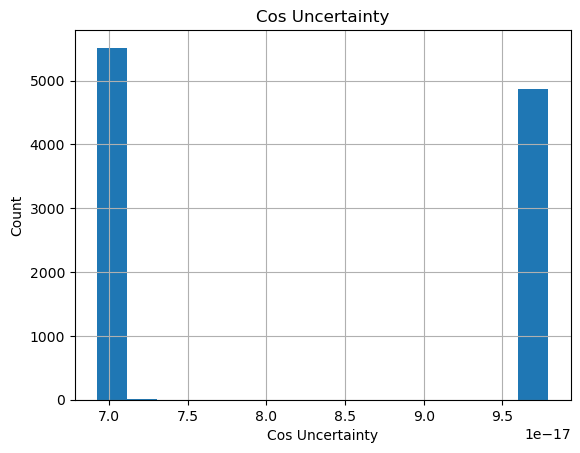

In [22]:
PlotHisto('Cos Uncertainty', 16, 15)

# Profile

In [23]:
df = pd.read_csv("../Python/Output/UncertainSin_6.txt", sep='\t')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../Python/Output/UncertainSin_6.txt'

In [ ]:
df['arc'] = df['Index'] / (1 << 6) * math.pi
df['lib error'] = np.sin(df['arc']) ** 2 + np.cos(df['arc']) ** 2 - 1
df = df.sort_values("arc")
df.head()

In [ ]:
fig, ax = plt.subplots()
ax.set_title(f'sin(x) and cos(x) error')
ax.set_xlabel('arc')
ax.set_ylabel('Error or Uncertainty')
plt.grid(True)

ax.plot(df['arc'], df['Error Value'], 'b-', label='Error Value')
ax.plot(df['arc'], df['Error Uncertainty'], 'b--', label='Error Uncertainty')
ax.plot(df['arc'], df['lib error'], 'g-', label='lib error')